In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys

In [2]:
begin = time.time()

In [3]:
with open('../archivos_dotplot/elemento1.fasta', 'r') as file:
    sec1 = file.read()

# Remove the first line and line breaks
sec1 = ''.join(sec1.split('\n')[1:])

In [4]:
with open('../archivos_dotplot/elemento2.fasta', 'r') as file:
    sec2 = file.read()

# Remove the first line and line breaks
sec2 = ''.join(sec2.split('\n')[1:])

In [5]:
print(sys.getsizeof(sec1))
print(type(sec1))

138226
<class 'str'>


In [6]:
print(sys.getsizeof(sec2))
print(type(sec2))

138226
<class 'str'>


In [7]:
sec1_array = np.array(list(sec1)).astype('str')
print(sec1_array)

print(np.unique(sec1_array))
print(len(sec1_array))

sys.getsizeof(sec1_array)

['G' 'A' 'A' ... 'T' 'G' 'T']
['A' 'C' 'G' 'N' 'T']
138177


552820

In [8]:
sec2_array = np.array(list(sec2)).astype('str')


In [9]:
array = np.array([0, 1, 2, 3, 4], dtype=np.uint8)

# Ensure values do not exceed the 3-bit range
assert np.all(array <= 5)

print(array)

[0 1 2 3 4]


In [10]:
mapping = {'A': 0, 'C': 1, 'G': 2,'N':3, 'T': 4}
sec1_arrayb = np.vectorize(mapping.get)(sec1_array).astype('uint8')
print(len(sec1_arrayb))

sys.getsizeof(sec1_arrayb)

138177


138289

In [11]:
sec2_arrayb = np.vectorize(mapping.get)(sec2_array).astype('uint8')

Tiempo total de ejecución: 7304.251919746399 segundos


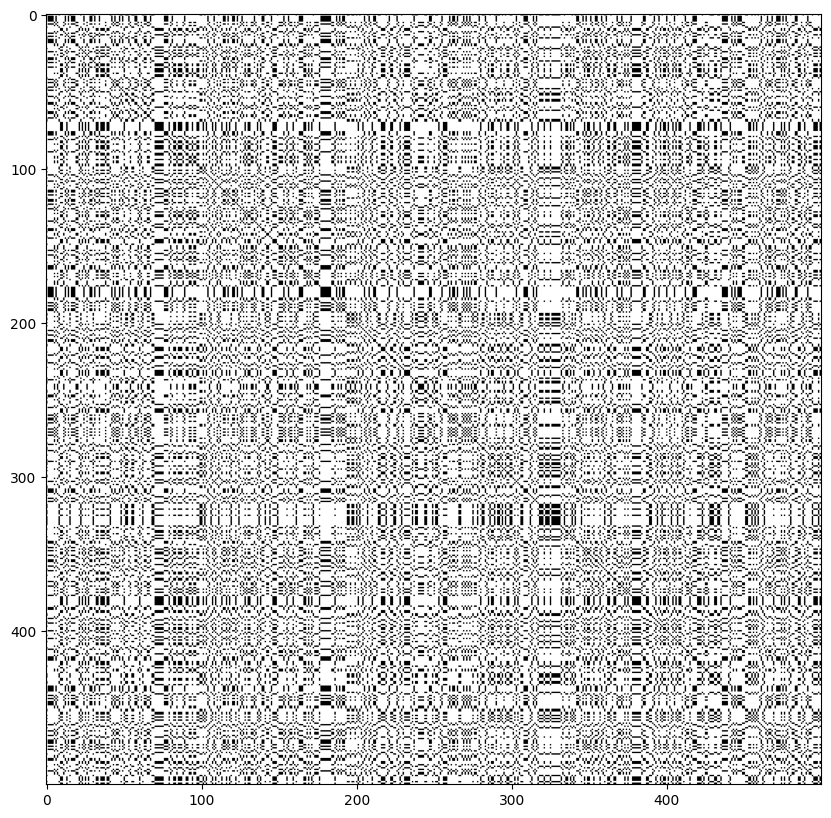

In [ ]:
dotplot = np.empty([len(sec1_arrayb),len(sec2_arrayb)],dtype=np.int8)

for i in range(len(sec1_arrayb)):
    for j in range(len(sec2_arrayb)):
        if  sec1_arrayb[i] == sec2_arrayb[j]:
            dotplot[i,j] = np.uint8(1)
        else:
            dotplot[i,j] = np.uint8(0)


merged_data = np.vstack(dotplot)


end = time.time()
print(f"Tiempo total de ejecución: {end-begin} segundos")
"""for i in range(size):
    print(np.shape(dotplot[i]))"""

plt.figure(figsize=(10,10))
plt.title("Dotplot Secuencial")
plt.xlabel("Seq2")
plt.ylabel("Seq1")
plt.imshow(merged_data[:500,:500], cmap='Greys',aspect='auto')
plt.savefig(f"ResultadoSEC.png")
    

In [13]:
print("Dotplot secuencial tiempo/proc: ", (end - begin))

Dotplot secuencial tiempo/proc:  7304.251919746399
